In [1]:
import sys
print(sys.version)
##cd C:\Users\nigolov\AppData\Local\Continuum\Anaconda3\Scripts

#homeDIR = "/usr/local/AvitoML/data/"
homeDIR = "C:/projects/AvitoML/data/"

import pandas as pd
import itertools
import nltk
import numpy as np
import pandas as pd
import re
from multiprocessing import Pool
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb
from sklearn.metrics import accuracy_score
from scipy.stats import gmean

from nltk.stem import SnowballStemmer
import pymorphy2
import sqlite3
from multiprocessing import Pool
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler,Binarizer, Normalizer 
from scipy.sparse import hstack
from scipy.sparse.csr import csr_matrix


import warnings
warnings.filterwarnings('ignore')

skip_words = []
print('ku')
print(homeDIR)

3.6.0 |Anaconda 4.3.0 (64-bit)| (default, Dec 23 2016, 11:57:41) [MSC v.1900 64 bit (AMD64)]
ku
C:/projects/AvitoML/data/


In [13]:
from nltk.corpus import stopwords
skip_words = set(stopwords.words('russian'))

In [14]:
skip_words 

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [3]:
df = pd.read_csv(homeDIR+'train.csv')
#print(df.head())
#print(df.shape) 
data = pd.DataFrame()
data['title'] = df['title']
data['description'] = df['description']
data['price'] = df['price']
data['item_id'] = df['item_id']
data['category_id'] = df['category_id']
#print(data.head())

In [12]:
from datetime import datetime
import time
df = pd.read_csv(homeDIR+'test.csv')
#print(df.head())
#print(df.shape) ##489517
testdata = pd.DataFrame()
testdata['title'] = df['title']
testdata['description'] = df['description']
testdata['price'] = df['price']
testdata['item_id'] = df['item_id']

n = datetime.now()
testdata['preprocessed1Title'] = [preproc1(el) for el in testdata['title']]
print('title time:', datetime.now() - n)
n = datetime.now()
testdata['preprocessed1Descr'] = [preproc1(el) for el in testdata['description']]
print('descr time:', datetime.now() - n)
n = datetime.now()
print(testdata.head())

title time: 0:00:20.357786
descr time: 0:03:05.090195
                      title  \
0    Стоик журнальный сталь   
1             iPhone 5 64Gb   
2                Утеплитель   
3       Пальто демисезонное   
4  Samsung syncmaster T200N   

                                         description    price  item_id  \
0  продам журнальный столик изготавливаю столы из...  10000.0   489517   
1  Телефон в хорошем состоянии. Комплект, гаранти...  12500.0   489518   
2  ТЕПЛОПЕЛЕН-ЛИДЕР ТЕПЛА!!! Толщина утеплителя :...    250.0   489519   
3  Продам пальто женское (букле) в отличном состо...   1700.0   489520   
4  Условно рабочий, проблема в панели настройки м...   1000.0   489521   

         preprocessed1Title                                 preprocessed1Descr  
0    стоик журнальный сталь  продавать журнальный столик изготовлять стол и...  
1             iphone 5 64gb  телефон в хороший состояние комплект гарантия ...  
2                утеплитель  теплопельный лидер тепло толщина утеплител

In [15]:
stemmer = SnowballStemmer('russian')
example = data.loc[1, 'description']
print(example)
def preproc3(text):
    tokens = []
    text = re.sub(u"[^a-zа-я0-9]", " ", text.lower())
    text = re.sub(u"\s+", " ", text)
    for token in re.split(' ', text.lower()):
        if len(token) > 1:
            norm_token = stemmer.stem(token)
            if norm_token in skip_words:
                continue
            tokens.append(norm_token)
    if len(tokens) == 0:
        return 'None'
    return ' '.join(tokens)

print(preproc3(example))

Продам недорого 4 стула из светлой прессованной кожи, стильные, ножки дугообразные.
прод недор стул светл прессова кож стильн ножк дугообразн


In [11]:
lemmer = Mystem()
def preproc1(text):
    text = re.sub(u"[^a-zа-я0-9]", " ", text.lower())
    text = re.sub(u"\s+", " ", text)
    tokens = lemmer.lemmatize(text)
    if len(tokens) == 0:
        print('None')
        return 'none'
    return " ".join([i.strip() for i in tokens if i.strip()])

print(preproc1(example))

продавать недорого 4 стул из светлый прессованный кожа стильный ножка дугообразный


In [10]:
def preproc2(text):
    text = re.sub(u"[^a-zа-я0-9]", " ", text.lower())
    text = re.sub(u"\s+", " ", text)
    tokens = lemmer.lemmatize(text)
    tmp = []
    for lem, res in zip(tokens, lemmer.analyze(text)):
        lem = lem.strip()
        if lem:
            if "analysis" in res:
                try:
                    res = res["analysis"][0]["gr"].split(",")[0].split("=")[0]
                except:
                    res = "UNKN"
            else:
                res = "UNKN"
            lem = "{}_{}".format(lem, res)
            tmp.append(lem)
    return " ".join(tmp)

print(preproc2(example))

продавать_V недорого_ADV 4_UNKN стул_S из_PR светлый_A прессованный_A кожа_S стильный_A ножка_S дугообразный_A


In [6]:
from datetime import datetime
import time
n = datetime.now()
data['preprocessed1Title'] = [preproc1(el) for el in data['title']]
print('title time:', datetime.now() - n)
n = datetime.now()
data['preprocessed1Descr'] = [preproc1(el) for el in data['description']]
print('descr time:', datetime.now() - n)
n = datetime.now()
data['preprocessed2Title'] = [preproc2(el) for el in data['title']]
print('title time:', datetime.now() - n)
n = datetime.now()
data['preprocessed2Descr'] = [preproc2(el) for el in data['description']]
print('descr time:', datetime.now() - n)
n = datetime.now()
data['preprocessed3Title'] = [preproc3(el) for el in data['title']]
print('title time:', datetime.now() - n)
n = datetime.now()
data['preprocessed3Descr'] = [preproc3(el) for el in data['description']]
print('descr time:', datetime.now() - n)


title time: 0:03:09.689236
descr time: 0:29:57.334242


In [8]:
#data.dropna(inplace=True)
#data.to_csv(homeDIR+ 'proc_data.csv', encoding='utf-8')
df=pd.read_csv(homeDIR+'proc_data.csv')
data = pd.DataFrame(df)
print(data.shape)
print(data.head())

(489517, 8)
   Unnamed: 0                                              title  \
0           0                                            Картина   
1           1                        Стулья из прессованной кожи   
2           2                                 Домашняя мини баня   
3           3  Эксклюзивная коллекция книг "Трансаэро" + подарок   
4           4                                       Ноутбук aser   

                                         description    price  item_id  \
0                         Гобелен. Размеры 139х84см.   1000.0        0   
1  Продам недорого 4 стула из светлой прессованно...   1250.0        1   
2  Мини баня МБ-1(мини сауна), предназначена для ...  13000.0        2   
3  Продам эксклюзивную коллекцию книг, выпущенную...   4000.0        3   
4  Продаётся ноутбук ACER e5-511C2TA. Куплен в ко...  19000.0        4   

   category_id                        preprocessed3Title  \
0           19                                    картин   
1           22

In [95]:
atitle = data['preprocessed1Title'].as_matrix() 
adescription = data['preprocessed1Descr'].as_matrix() 
aprice = data['price'].as_matrix()
print(atitle.shape,type(atitle))
count_vect = CountVectorizer(ngram_range=(1,1))
d = np.concatenate([atitle,adescription])
print(d.shape)
count_vect.fit(d)
d1=count_vect.transform(atitle)
d2=count_vect.transform(adescription)
print(d1.shape,d2.shape)


p= np.log(aprice)
p= np.reshape(p,(len(p),1))
p = MaxAbsScaler().fit_transform(p)
lb = LabelBinarizer()
p = lb.fit_transform((100*p)//1)
print(p.shape)


dc=csr_matrix(hstack((d1,d2,p)))
tf_transformer = TfidfTransformer(use_idf=False)
dcr= tf_transformer.fit_transform(dc)
print(dcr[0])

#dcrp = csr_matrix(hstack((dcr, p)))
#print(dcrp[0])


(489517,) <class 'numpy.ndarray'>
(979034,)
(489517, 339250) (489517, 339250)
(489517, 86)
  (0, 234869)	0.4472135955
  (0, 356073)	0.4472135955
  (0, 552160)	0.4472135955
  (0, 631480)	0.4472135955
  (0, 678527)	0.4472135955


In [55]:

aprice = data['price'].as_matrix()


(489517,) <class 'numpy.ndarray'>
(489517,) <class 'numpy.ndarray'>
(489517, 1) <class 'numpy.ndarray'>
(489517, 1)


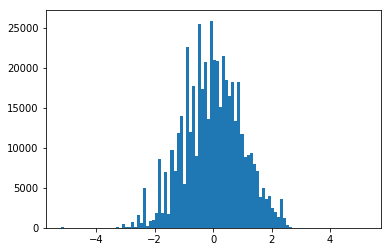

In [96]:
import matplotlib.pyplot as plt
from  sklearn.preprocessing import quantile_transform,LabelBinarizer
from scipy.stats.mstats import mquantiles
p = data['price'].as_matrix()
print(p.shape,type(p))
print(p.shape,type(p))
p= np.reshape(p,(len(p),1))
print(p.shape,type(p))

#p scaled to 0-1 interval
p= np.log(p)
#p = .fit_transform(p)
p=quantile_transform(p,  n_quantiles=100,output_distribution='normal' )

#p=quantile_transform(p,  n_quantiles=100,output_distribution='uniform' )

print(p.shape)

plt.hist(p, 100)
plt.show()

lb = LabelBinarizer()
p = lb.fit_transform((100*p)//1)

In [23]:
def proc_fit(atitle, adescription, aprice, a_ngram):
    count_vect = CountVectorizer(ngram_range=(1,a_ngram))    
    d = np.concatenate([atitle,adescription])
    count_vect.fit(d)
    d1=count_vect.transform(atitle)
    d2=count_vect.transform(adescription)

    p= np.log(aprice)
    p= np.reshape(p,(len(p),1))
    scaler = MaxAbsScaler()
    p = scaler.fit_transform(p)
    
    dc=csr_matrix(hstack((d1,d2,p)))
    tf_transformer = TfidfTransformer(use_idf=False)
    dcr= tf_transformer.fit_transform(dc)

    return dcr, (count_vect,scaler,tf_transformer)

In [21]:
def proc_trans(atitle, adescription, aprice, prcsrs):
    count_vect,scaler,tf_transformer = prcsrs
       
    d = np.concatenate([atitle,adescription])
    d1=count_vect.transform(atitle)
    d2=count_vect.transform(adescription)

    p= np.log(aprice)
    p= np.reshape(p,(len(p),1))    
    p = scaler.transform(p)
    
    dc=csr_matrix(hstack((d1,d2,p)))
    tf_transformer = TfidfTransformer(use_idf=False)
    dcr= tf_transformer.transform(dc)

    return dcr

In [18]:
print(len(data['price'].as_matrix()))

489517


In [33]:
GAP = 400000

x_trn, prcsrs = proc_fit(
        data['preprocessed1Title'].as_matrix(),
        data['preprocessed1Descr'].as_matrix(),
        data['price'].as_matrix(), 2)
y_trn = data['category_id']

x_val = proc_trans(
        data['preprocessed1Title'][GAP:].as_matrix(),
        data['preprocessed1Descr'][GAP:].as_matrix(),
        data['price'][GAP:].as_matrix(), prcsrs)
y_val = data['category_id'][GAP:]

print(x_trn.shape, x_val.shape,y_trn.shape, y_val.shape)

#clf = MultinomialNB(alpha=0.03)
clf = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)

clf.fit(x_trn, y_trn)
y_prd = clf.predict_proba(x_val)

print(y_prd.shape)
print(accuracy_score(y_val, np.argmax(y_prd, axis=1)), y_prd.shape)

(489502, 9234453) (89502, 9234453) (489502,) (89502,)
(89502, 54)
0.941822529105 (89502, 54)


In [34]:
x_tst = proc_trans(
        testdata['preprocessed1Title'].as_matrix(),
        testdata['preprocessed1Descr'].as_matrix(),
        testdata['price'].as_matrix(), prcsrs)

y_prd = clf.predict_proba(x_tst)

print(y_prd.shape)

res = pd.DataFrame(np.argmax(y_prd, axis=1), index = testdata['item_id'], columns=['category_id'])

print(res.shape)

res.to_csv(homeDIR+ 'submission.csv', encoding='utf-8')
res.head()

#(489502, 678501) (89502, 678501) (489502,) (89502,)
#(89502, 54)
#0.911812026547 (89502, 54)

(243166, 54)
(243166, 1)


,category_id
item_id,
489517,22
489518,0
489519,15
489520,33
489521,13


In [110]:
sgd = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
lgr = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
mnb = MultinomialNB(alpha=0.03)

n = datetime.now()
y = data['category_id']
xs = [proc(
        data['preprocessed1Title'].as_matrix(),
        data['preprocessed1Descr'].as_matrix(),
        data['price'].as_matrix(),
        2,MaxAbsScaler(),100),
      proc(
        data['preprocessed1Title'].as_matrix(),
        data['preprocessed1Descr'].as_matrix(),
        data['price'].as_matrix(),
        2,MaxAbsScaler(),1000)
     ]


#'SGD', 'lrg', 'mnb'
# sgd, lgr,mnb

print('start', datetime.now()-n)

for x in xs:
    print(x.shape,y.shape)
    for clf, name in zip([sgd], ['SGD']):
        x_trn, x_val, y_trn, y_val = train_test_split(x, y, random_state=666, stratify=y, test_size=0.20)
        clf.fit(x_trn, y_trn)
        y_prd = clf.predict_proba(x_val)
        acc=accuracy_score(y_val, np.argmax(y_prd, axis=1))
        print(f'clf:{name}, mean_acc:{acc:0.4f}',datetime.now()-n)
        n = datetime.now()
        
  



start 0:02:52.532110
(489517, 9234572) (489517,)
clf:SGD, mean_acc:0.8903 0:52:20.847342
(489517, 9235207) (489517,)
clf:SGD, mean_acc:0.8904 0:49:16.351094


In [102]:
from sklearn.preprocessing import QuantileTransformer
xs = [proc(
        data['preprocessed1Title'].as_matrix(),
        data['preprocessed1Descr'].as_matrix(),
        data['price'].as_matrix(),
        1,MaxAbsScaler(),100),
      proc(
        data['preprocessed2Title'].as_matrix(),
        data['preprocessed2Descr'].as_matrix(),
        data['price'].as_matrix(),
        1,QuantileTransformer(n_quantiles=100, output_distribution='uniform') ,100),
      proc(
        data['preprocessed3Title'].as_matrix(),
        data['preprocessed3Descr'].as_matrix(),
        data['price'].as_matrix(),
        1,QuantileTransformer(n_quantiles=100, output_distribution='normal'),100)
     ]

for x in xs:
    print(x.shape)
    


(489517, 678586)
(489517, 681222)
(489517, 638153)


In [12]:
from datetime import datetime
import time
n = datetime.now()
testdata['preprocessedTitle'] = [preproc3(el) for el in testdata['title']]
print('title time:', datetime.now() - n)
n = datetime.now()
testdata['preprocessedDescr'] = [preproc3(el) for el in testdata['description']]
print('descr time:', datetime.now() - n)

title time: 0:01:32.135138
descr time: 0:14:43.003058


In [1]:
connection = sqlite3.connect("C:\projects\AvitoML\data\items.sqlite")

data = pd.read_sql_query('''select catdata._rowid_ as item_id, preprocessedTitle, preprocessedDescr, price, 
                                category_id as y2, c0ind as y0, c1ind as y1  
                                from catdata join catind using(category_id)''', connection)

catdata = pd.read_sql_query('select c0ind as y0, c1ind as y1, category_id as y2 from catind order by category_id ', connection)

data.head()

NameError: name 'sqlite3' is not defined

In [7]:
print(data.shape)
print(catdata.shape)
catdata.head()

(489517, 6)
(54, 3)


,y0,y1,y2
0,3,3,0
1,3,11,1
2,3,3,2
3,3,8,3
4,3,18,4


In [13]:
xT_train=     data['preprocessedTitle'].as_matrix() 
xD_train=     data['preprocessedDescr'].as_matrix() 
xT_test = testdata['preprocessedTitle'].as_matrix() 
xD_test = testdata['preprocessedDescr'].as_matrix() 

ptrain  =     data['price'].as_matrix()
ptest   = testdata['price'].as_matrix()


#xPln_train= csr_matrix(MaxAbsScaler().fit_transform(np.log(data['price'].as_matrix()))).T
#y = data['y2'].as_matrix() 
y0 = data['y0'].as_matrix() 
y1 = data['y1'].as_matrix() 
y2 = data['y2'].as_matrix() 

In [16]:
count_vect = CountVectorizer()
count_vect.fit(xT_train)
count_vect.fit(xD_train)
count_vect.fit(xT_test)
count_vect.fit(xD_test)

X_countTr = count_vect.transform(xT_train)
X_countDr = count_vect.transform(xD_train)
print(X_countTr.shape,X_countDr.shape)
X_countTs = count_vect.transform(xT_test)
X_countDs = count_vect.transform(xD_test)
print(X_countTs.shape,X_countDs.shape)
x_countr = csr_matrix(hstack((X_countTr, X_countDr)))
print(x_countr.shape)
x_counts = csr_matrix(hstack((X_countTs, X_countDs)))
print(x_counts.shape)

(489517, 191418) (489517, 191418)
(243166, 191418) (243166, 191418)
(489517, 382836)
(243166, 382836)


(732683,)
(732683,)


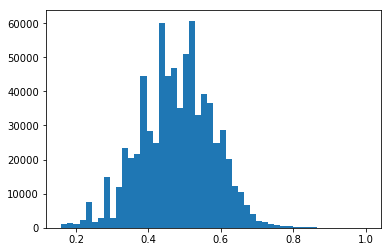

(489517, 1)
(243166, 1)


In [105]:
import matplotlib.pyplot as plt
p = np.append(ptrain,ptest)
print(p.shape)


p = MaxAbsScaler().fit_transform(np.log(p))
print(p.shape)
plt.hist(p, 50)
plt.show()

xPln_train= csr_matrix(p[:489517]).T
xPln_test=  csr_matrix(p[489517:]).T
print(xPln_train.shape)
print(xPln_test.shape)

In [7]:
count_vect = CountVectorizer()
x_countT = count_vect.fit_transform(xT)
x_countD = count_vect.fit_transform(xD)

print(x_countT.shape,x_countD.shape)
x_count = csr_matrix(hstack((x_countT, x_countD))) # !!! ,xP_tf add
print(x_countT[0], 'k', x_countD[0])
print(x_count.shape)
print(x_count[0])

(489517, 120250) (489517, 286485)
  (0, 89233)	1 k   (0, 15366)	1
  (0, 246064)	1
  (0, 176745)	1
(489517, 406735)
  (0, 89233)	1
  (0, 135616)	1
  (0, 296995)	1
  (0, 366314)	1


In [30]:
tf_transformer = TfidfTransformer(use_idf=False).fit(x_countr)
TfidfTransformer(use_idf=False).fit(x_counts)


x_tr = tf_transformer.transform(x_countr)
x_tr= csr_matrix(hstack((x_tr, xPln_train)))

x_ts = tf_transformer.transform(x_counts)
x_ts= csr_matrix(hstack((x_ts, xPln_test)))

print(x_tr[0])
print(x_tr.shape)
print(x_ts[0])
print(x_ts.shape)

  (0, 127345)	0.57735026919
  (0, 305134)	0.57735026919
  (0, 354455)	0.57735026919
  (0, 382836)	0.428571428571
(489517, 382837)
  (0, 120941)	0.2
  (0, 173338)	0.2
  (0, 174070)	0.2
  (0, 301947)	0.2
  (0, 303736)	0.2
  (0, 306758)	0.2
  (0, 308800)	0.2
  (0, 312359)	0.2
  (0, 312614)	0.2
  (0, 315537)	0.2
  (0, 315648)	0.2
  (0, 316006)	0.2
  (0, 318096)	0.2
  (0, 332711)	0.2
  (0, 335538)	0.2
  (0, 340029)	0.2
  (0, 347167)	0.2
  (0, 351312)	0.2
  (0, 351459)	0.2
  (0, 354455)	0.2
  (0, 364756)	0.2
  (0, 365055)	0.2
  (0, 365494)	0.2
  (0, 365527)	0.2
  (0, 365553)	0.2
  (0, 382836)	0.571428571429
(243166, 382837)


In [31]:
x_trn, x_val, y_trn, y_val = train_test_split(x_tr, y2, random_state=666, stratify=y2, test_size=0.20)
print(x_trn.shape, x_val.shape)
#(391613, 406736) (97904, 406736)

(391613, 382837) (97904, 382837)


In [33]:
n = datetime.now()
logreg = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg.fit(x_trn, y_trn)
y_lgr = logreg.predict_proba(x_val)
print(y_lgr.shape) 
print(accuracy_score(y_val, np.argmax(y_lgr, axis=1))) ##0.977330715787 - overfitted
print('LR time', datetime.now()-n)
n = datetime.now()

(97904, 54)
0.882119218827
Y0 LR time 0:04:17.640891


In [73]:
n = datetime.now()
svm = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
svm = svm.fit(x_trn, y_trn)

yrd_svm = svm.predict_proba(x_val)
print(yrd_svm.shape)

print(accuracy_score(y_val, np.argmax(yrd_svm, axis=1)))
print('SVM time', datetime.now()-n)
n = datetime.now()


(97904, 54)
0.888339597974
SVM time 0:29:05.061933


In [34]:
n = datetime.now()
logreg0 = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg0.fit(x_tr, y0)
y0_lgr = logreg0.predict_proba(x_tr)
print(y0_lgr.shape) 
print(accuracy_score(y0, np.argmax(y0_lgr, axis=1))) ##0.977330715787 - overfitted
print('Y0 LR time', datetime.now()-n)
n = datetime.now()

logreg1 = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg1.fit(x_tr, y1)
y1_lgr = logreg1.predict_proba(x_tr)
print(y1_lgr.shape)
print(accuracy_score(y1, np.argmax(y1_lgr, axis=1))) ##0.972464694791 - overfitted
print('Y1 LR time', datetime.now()-n)
n = datetime.now()

logreg2 = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg2.fit(x_tr, y2)
y2_lgr = logreg2.predict_proba(x_tr)
print(y2_lgr.shape)
print(accuracy_score(y2, np.argmax(y2_lgr, axis=1))) ##0.939374934885 - overfitted 
                                                        ##0.881720869423 - ok
print('Y2 LR time', datetime.now()-n)
n = datetime.now()

(489517, 4)
0.975716880108
Y0 LR time 0:00:52.269890
(489517, 23)
0.970638404795
Y1 LR time 0:02:55.793015
(489517, 54)
0.936539486882
Y2 LR time 0:05:05.652708


In [108]:
n = datetime.now()
sgd0 = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
sgd0.fit(x_tr, y0)
y0_lgr = sgd0.predict_proba(x_tr)
print(y0_lgr.shape) 
print(accuracy_score(y0, np.argmax(y0_lgr, axis=1))) ##0.977330715787 - overfitted
print('Y0 SGD time', datetime.now()-n)
n = datetime.now()

sgd1 = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
sgd1.fit(x_tr, y1)
y1_lgr = sgd1.predict_proba(x_tr)
print(y1_lgr.shape)
print(accuracy_score(y1, np.argmax(y1_lgr, axis=1))) ##0.972464694791 - overfitted
print('Y1 SGD time', datetime.now()-n)
n = datetime.now()

sgd2 = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
sgd2.fit(x_tr, y2)
y2_lgr = sgd2.predict_proba(x_tr)
print(y2_lgr.shape)
print(accuracy_score(y2, np.argmax(y2_lgr, axis=1))) ##0.939374934885 - overfitted 
                                                        ##0.881720869423 - ok
print('Y2 SGD time', datetime.now()-n)
n = datetime.now()

(489517, 4)
0.967271820999
Y0 CLF time 0:03:52.950597
(489517, 23)
0.958565279653
Y1 CLF time 0:14:50.750033
(489517, 54)
0.915097943483
Y2 CLF time 0:37:01.923953


In [109]:
cat1dict = {}
cat0dict = {}

X = x_ts

#Y = y2

#print(accuracy_score(y2, np.argmax(y2_lgr, axis=1)))
y0_lgr = logreg0.predict_proba(X)
y1_lgr = logreg1.predict_proba(X)
y2_lgr = logreg2.predict_proba(X)

y0_sgd = sgd0.predict_proba(X)
y1_sgd = sgd1.predict_proba(X)
y2_sgd = sgd2.predict_proba(X)

print(y2_lgr.shape, y1_lgr.shape,y0_lgr.shape)
print(y2_sgd.shape, y1_sgd.shape,y0_sgd.shape)
for i,r in catdata.iterrows():
    cat1dict[r['y2']] = r['y1'] 
    cat0dict[r['y2']] = r['y0']     
print(cat1dict, cat0dict)


(243166, 54) (243166, 23) (243166, 4)
(243166, 54) (243166, 23) (243166, 4)
{0: 3, 1: 11, 2: 3, 3: 8, 4: 18, 5: 22, 6: 3, 7: 12, 8: 18, 9: 3, 10: 3, 11: 3, 12: 22, 13: 1, 14: 1, 15: 5, 16: 14, 17: 5, 18: 14, 19: 14, 20: 7, 21: 5, 22: 14, 23: 14, 24: 6, 25: 5, 26: 20, 27: 14, 28: 14, 29: 20, 30: 2, 31: 10, 32: 2, 33: 10, 34: 2, 35: 10, 36: 0, 37: 15, 38: 10, 39: 10, 40: 0, 41: 2, 42: 4, 43: 17, 44: 16, 45: 16, 46: 4, 47: 4, 48: 21, 49: 9, 50: 13, 51: 17, 52: 13, 53: 19} {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 9: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0}


In [66]:
i = 6
print(y2_lgr[i])
print(y1_lgr[i])
print(y0_lgr[i])
print(y2p[i])
print(y2hp[i])

[  3.50194664e-02   9.56504603e-03   2.41960864e-02   4.09910434e-03
   9.32249597e-03   4.76550887e-03   8.73169617e-03   8.84495464e-04
   3.89185876e-03   5.36532788e-04   1.48841822e-02   4.97697110e-03
   1.54875101e-02   3.68358543e-03   2.31860266e-03   2.02507235e-03
   6.16551225e-03   3.40299041e-03   8.71100438e-03   5.68152661e-03
   5.17573641e-03   1.57308044e-03   2.74947758e-03   8.33842472e-03
   1.20056973e-04   1.59175985e-03   3.91662836e-03   4.81121512e-03
   1.39021446e-03   6.38334442e-03   3.68112212e-03   2.03731163e-03
   4.75323821e-03   5.33113351e-03   3.25927567e-03   3.40924232e-03
   7.69292452e-02   4.10782473e-03   1.00302096e-03   9.23529532e-03
   1.05863137e-02   1.00347072e-03   3.21411004e-03   3.36733804e-04
   3.16646880e-02   8.27910673e-04   5.47304377e-03   6.03693827e-03
   2.02247858e-04   5.47537610e-03   5.20364817e-01   1.97974820e-04
   9.50866164e-02   1.38386242e-03]
[  9.26914825e-02   5.66883409e-03   5.65424450e-03   5.02297368e-0

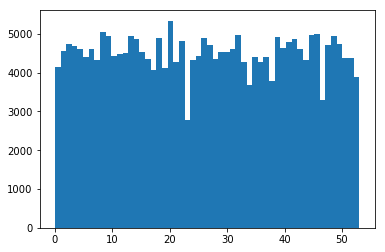

0.899064389606

In [113]:
cat1map = np.array(list(cat1dict.values()))
cat0map = np.array(list(cat0dict.values()))
y2_ttl = y2_sgd.copy()
#print(cat1map, cat0map)
for i in range(len(y2_sgd)):    
    y2_ttl[i] *= y1_sgd[i][cat1map] 
    y2_ttl[i] *= y0_sgd[i][cat0map]
y2p_sgd  = np.argmax(y2_sgd, axis=1)
y2hp_sgd = np.argmax(y2_sgd, axis=1)
plt.hist(y2hp_sgd,54)
plt.show()
--0.899064389606    

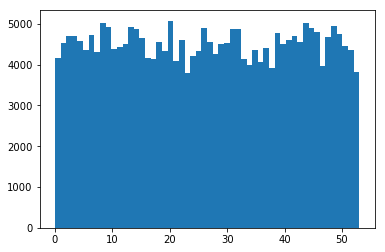

In [114]:
cat1map = np.array(list(cat1dict.values()))
cat0map = np.array(list(cat0dict.values()))
y2_ttl = y2_lgr.copy()
#print(cat1map, cat0map)
for i in range(len(y2_lgr)):    
    y2_ttl[i] *= y1_lgr[i][cat1map] 
    y2_ttl[i] *= y0_lgr[i][cat0map]
y2p_lgr  = np.argmax(y2_lgr, axis=1)
y2hp_lgr = np.argmax(y2_lgr, axis=1)
plt.hist(y2hp_lgr,54)
plt.show()

In [117]:
print(accuracy_score(y2hp_lgr, y2hp_sgd))
print(accuracy_score(res['category_id'], y2hp_lgr))

0.95489912241
0.983106190833


In [118]:
res = pd.DataFrame(y2hp_sgd, index = testdata['item_id'], columns=['category_id'])
#res['item_id'] = testdata['item_id']
#res['category_id'] = y2hp
print(res.shape)

res.to_csv(homeDIR+ 'submission.csv', encoding='utf-8')
res.head()

(243166, 1)


,category_id
item_id,
489517,22
489518,0
489519,15
489520,33
489521,13


In [70]:
res.columns

Index(['item_id', 'category_id'], dtype='object')

In [ ]:
print(accuracy_score(Y, np.argmax(y2_lgr, axis=1))) ##0.939374934885 - overfitted
print(accuracy_score(Y, np.argmax(y2_ttl, axis=1))) 

In [60]:
print(type(y2))

<class 'numpy.ndarray'>


In [ ]:
if y2[i] != y2p:
        y1p = cat1dict[y2p]
        if cat1dict[y2[i]] != y1p:
            print(i,'true y2:',  y2[i], y2_lgr[i][y2[i]], 'pred y2:',y2p, y2_lgr[i][y2p] )

            print(' true y1:', cat1dict[y2[i]], y1_lgr[i][cat1dict[y2[i]]] ) ## true y1
            print(' pred y1:', cat1dict[y2p  ], y1_lgr[i][cat1dict[y2p]] ) ## false y1
            
            print(' true y0:', cat0dict[y2[i]], y0_lgr[i][cat0dict[y2[i]]] ) ## true y0
            print(' pred y0:', cat0dict[y2p  ], y0_lgr[i][cat0dict[y2p]] ) ## false y0
            
            print(y2_lgr[i],len(y2_lgr[i]))
            
            print(y1_lgr[i][cat1map],len(y1_lgr[i][cat1map]))
            print(y1_lgr[i],len(y1_lgr[i]))
            
            print(y0_lgr[i][cat0map],len(y0_lgr[i][cat0map]))
            print(y0_lgr[i],len(y0_lgr[i]))
            
            y2_ttl[i] *= y1_lgr[i][cat1map] 
            y2_ttl[i] *= y0_lgr[i][cat0map]
            
            print(len(y2_ttl[i]), np.argmax(y2_ttl[i]), y2_ttl[i])
            
            
            break

In [149]:
x_trn, x_val, y_trn, y_val = train_test_split(x_tf, y, random_state=666, stratify=y, test_size=0.20)
print(x_trn.shape, x_val.shape)

(391613, 406736) (97904, 406736)


In [150]:
n = datetime.now()
logreg = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg.fit(x_trn, y_trn)
yrd_lgr = logreg.predict_proba(x_val)
print(yrd_lgr.shape)
print(accuracy_score(y_val, np.argmax(yrd_lgr, axis=1)))

err_df = pd.DataFrame()
err_df['y']= y_val
err_df['y_p']= np.argmax(yrd_lgr, axis=1)
err_df['correct']= y_val==np.argmax(yrd_lgr, axis=1)
print(err_df[err_df.y==err_df.y_p].groupby(['y'])['correct'].count() / err_df.groupby(['y'])['correct'].count())


print('LR time', datetime.now()-n)
#0.791867543716 LR for description
#0.854694394509 LR for title
#0.881332734107 LR for both
#0.881720869423 LR for both and normalized price
#0.957529825135 LR for both for y0

(97904, 4)
0.957580895571
y
0    0.926599
1    0.947204
2    0.964371
3    0.985116
Name: correct, dtype: float64
LR time 0:00:40.205063


In [151]:
n = datetime.now()
print(yrd_lgr.shape)
svm = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
svm = svm.fit(x_trn, y_trn)

yrd_svm = svm.predict_proba(x_val)
print(yrd_svm.shape)
print(accuracy_score(y_val, np.argmax(yrd_svm, axis=1)))

err_df = pd.DataFrame()
err_df['y']= y_val
err_df['y_p']= np.argmax(yrd_svm, axis=1)
err_df['correct']= y_val==np.argmax(yrd_svm, axis=1)
print(err_df[err_df.y==err_df.y_p].groupby(['y'])['correct'].count() / err_df.groupby(['y'])['correct'].count())

print('SGD time', datetime.now()-n)

(97904, 4)
(97904, 4)
0.957989459062
y
0    0.076992
1    0.052377
2    0.033406
3    0.013019
Name: correct, dtype: float64
SGD time 0:02:48.249999


In [152]:
n = datetime.now()
mnb = MultinomialNB(alpha=0.03)
mnb = mnb.fit(x_trn, y_trn)

yrd_mnb = mnb.predict_proba(x_val)

print(yrd_mnb.shape)
print(accuracy_score(y_val, np.argmax(yrd_mnb, axis=1)))

err_df = pd.DataFrame()
err_df['y']= y_val
err_df['y_p']= np.argmax(yrd_mnb, axis=1)
err_df['correct']= y_val==np.argmax(yrd_mnb, axis=1)
print(err_df[err_df.y==err_df.y_p].groupby(['y'])['correct'].count() / err_df.groupby(['y'])['correct'].count())

print('NB time', datetime.now() - n)

(97904, 4)
0.948949991829
y
0    0.898721
1    0.941053
2    0.964300
3    0.981690
Name: correct, dtype: float64
NB time 0:00:00.540487


In [88]:
s1_out = s1_clf.predict_proba(x_tf)
s1_out = np.argmax(s1_out, axis=1)
#s1_out = data['y0'].as_matrix()
c0set = sorted(set(s1_out))
y2 = data['y2'].as_matrix() 

for c0 in c0set:
    xc0 = x_tf[s1_out == c0]
    yc0 = y2[s1_out == c0]
    print(c0, xc0.shape,yc0.shape)
    c2set = sorted(set(yc0))
    idx2label = dict(enumerate(c2set))
    label2idx = {v: k for k, v in idx2label.items()}
    print(c2set)
    yc0 = np.array([label2idx[cat] for cat in yc0.tolist()])
    
    x_trn, x_val, y_trn, y_val = train_test_split(xc0, yc0, random_state=666,  test_size=0.20)
    print(x_trn.shape, x_val.shape)
    
    logreg = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
    logreg.fit(x_trn, y_trn)
    yrd_lgr = logreg.predict_proba(x_val)
    #print(yrd_lgr[0], np.argmax(yrd_lgr[0]),y_val[0] )
    print(yrd_lgr.shape)
    print('LogReg',accuracy_score(y_val, np.argmax(yrd_lgr, axis=1)))

    mnb = MultinomialNB(alpha=0.03)
    mnb = mnb.fit(x_trn, y_trn)
    yrd_mnb = mnb.predict_proba(x_val)
    print('NB',accuracy_score(y_val, np.argmax(yrd_mnb, axis=1)))

    #svm = SGDClassifier(loss='modified_huber',alpha=1e-5,n_iter=700,random_state=666,n_jobs=-1)
    #svm = svm.fit(x_trn, y_trn)
    #yrd_svm = svm.predict_proba(x_val)
    #print('SVM',accuracy_score(y_val, np.argmax(yrd_svm, axis=1)))
    
    ##NEED REINDEX!

0 (110003, 406735) (110003,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
(88002, 406735) (22001, 406735)
(22001, 54)
LogReg 0.88064178901
NB 0.882823508022
1 (106823, 406735) (106823,)
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
(85458, 406735) (21365, 406735)
(21365, 52)
LogReg 0.871284811608
NB 0.862672595366
2 (141238, 406735) (141238,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
(112990, 406735) (28248, 406735)
(28248, 54)
LogReg 0.855741999434
NB 0.852378929482
3 (131453, 406735) (131453,)
[0, 1, 2, 3, 4, 5,

In [ ]:
0    0.926510  -> 0.88 (0.91)
1    0.947390  -> 0.87 (0.899)
2    0.964121  -> 0.85 (0.88)
3    0.985154  -> 0.93 (0.94)

In [16]:
s1_out = logreg.predict_proba(x_tf)
print(s1_out.shape)
print(s1_out[0])
s2_in = csr_matrix(hstack((x_tf, s1_out)))
print(s2_in.shape)
s2_y = data['y1'].as_matrix()

(489517, 4)
[  9.09025503e-04   1.97521402e-04   9.98851868e-01   4.15851114e-05]
(489517, 406739)


In [17]:
x_trn, x_val, y_trn, y_val = train_test_split(s2_in, s2_y, random_state=666, stratify=y, test_size=0.20)
print(x_trn.shape, x_val.shape)

(391613, 406739) (97904, 406739)


In [22]:
from datetime import datetime
n = datetime.now()
logreg = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg.fit(x_trn, y_trn)
yrd_lgr = logreg.predict_proba(x_val)
print(yrd_lgr.shape)
print(accuracy_score(y_val, np.argmax(yrd_lgr, axis=1)))
print('fit for s2:', datetime.now() - n)

#0.936805442066 for LR

(97904, 23)
0.936805442066
fit for s2: 0:02:19.055009


In [23]:
s2_out = logreg.predict_proba(s2_in)
print(s2_out.shape)
s3_in = csr_matrix(hstack((s2_in, s2_out)))
print(s3_in.shape)
s3_y = data['y2'].as_matrix()

(489517, 23)
(489517, 406762)


In [26]:
x_trn, x_val, y_trn, y_val = train_test_split(s3_in, s3_y, random_state=666, stratify=y, test_size=0.20)
print(x_trn.shape, x_val.shape)

(391613, 406762) (97904, 406762)


In [27]:
from datetime import datetime
n = datetime.now()
logreg = LogisticRegression(solver="sag", multi_class = "multinomial", C=5)
logreg.fit(x_trn, y_trn)
yrd_lgr = logreg.predict_proba(x_val)
print(yrd_lgr.shape)
print(accuracy_score(y_val, np.argmax(yrd_lgr, axis=1)))
print('fit for s3:', datetime.now() - n)

#0.875418777578

(97904, 54)
0.875418777578
fit for s3: 0:09:12.468643
